# Exercises Sheet 1 Introduction to Machine Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import pandas as pd

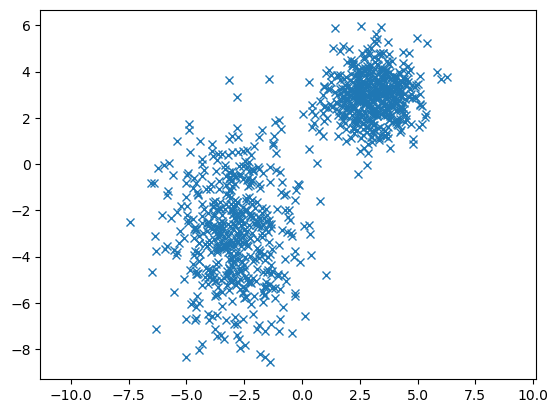

In [2]:
# Define the mean and covariance matrix for the first set of points
mean = [3, 3]  # Mean for the first set of points
cov = [[1, 0], [0, 1]]  # Covariance matrix for the first set (independent x and y)

# Generate 500 random points from a multivariate normal distribution with the above mean and covariance
a = np.random.multivariate_normal(mean, cov, 500).T

# Define the mean and covariance matrix for the second set of points
mean = [-3, -3]  # Mean for the second set of points
cov = [[2, 0], [0, 5]]  # Covariance matrix for the second set (independent x and y but with different variance)

# Generate 500 random points for the second distribution
b = np.random.multivariate_normal(mean, cov, 500).T

# Concatenate the two sets of points (a and b)
c = np.concatenate((a, b), axis=1)

# Transpose the array so that each column is a point (for shuffling)
c = c.T

# Shuffle the points randomly
np.random.shuffle(c)

# Transpose back to the original format
c = c.T

# Separate x and y coordinates
x = c[0]
y = c[1]

# Plot the points with 'x' markers
plt.plot(x, y, 'x')

# Ensure the axes have equal scaling
plt.axis('equal')

# export to csv file
df = pd.DataFrame(c.T)
df.to_csv("nome.csv")

# Show the plot
plt.show()


## K-means

### Ex 1.1, 1.2 e 1.3

Generating the first pair of random p1 and p2 and plotting (Ex 1.2 (ii)):

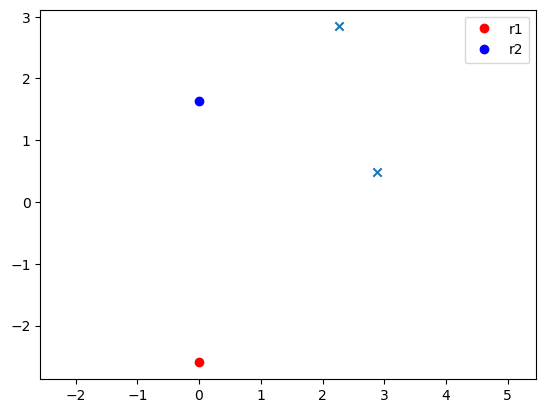

In [3]:
r1, r2 = c.T[np.random.choice(range(c.T.shape[0]), 2), :2] # two random points

# Plot the points, using the first column of data for x-values and the second column for y-values
plt.scatter(c.T[0], c.T[1], marker='x')
plt.axis('equal') # Ensure that the x and y axes are scaled equally, so the plot is not distorted

plt.plot(r1[0], 'ro', label='r1')
plt.plot(r2[0], 'bo', label='r2')
plt.legend()
plt.show()

Running K-means several times

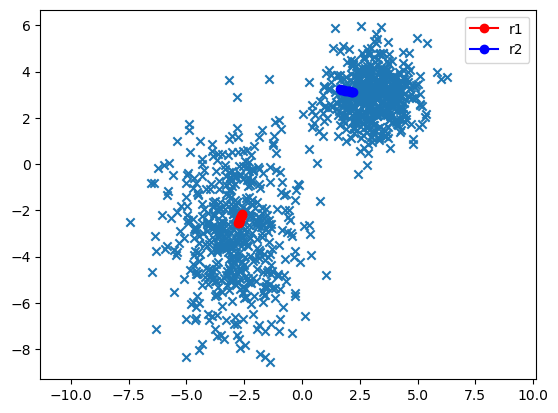

In [4]:
alapha=10e-5
epochs = 11
data = c.T
# To save each iteration of the points
history_r1, history_r2 = [r1.copy()], [r2.copy()]

for i in range(0,epochs):
    for x in data:

        if np.linalg.norm(x[:2] - r1) < np.linalg.norm(x[:2] - r2):
            # It's closer to r1
            r1 = (1 - alapha) * r1 + alapha * x[:2]
        else:
            # It's closer to r2
            r2 = (1 - alapha) * r2 + alapha * x[:2]

    history_r1.append(r1.copy())
    history_r2.append(r2.copy())

# Plot the points
plt.scatter(data[:, 0], data[:, 1], marker='x')
plt.axis('equal')
plt.plot([r[0] for r in history_r1], [r[1] for r in history_r1], 'ro-', label='r1')
plt.plot([r[0] for r in history_r2], [r[1] for r in history_r2], 'bo-', label='r2')
plt.legend()
plt.show()

In the above example, because the alpha is very small, the step in each iteration and the leraning rate are very small, increasing the alpha helps to see a difference but makes it more imprecise, increasing the epochs, gives more precision in exchange for computing time:

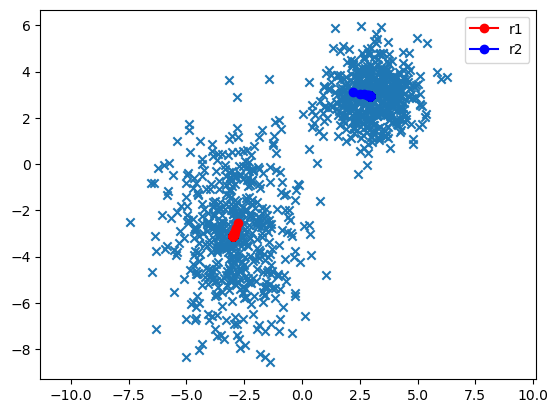

In [5]:
alapha=0.001
epochs = 110

# To save each iteration of the points
history_r1, history_r2 = [r1.copy()], [r2.copy()]

for i in range(0,epochs):
    for x in data:

        if np.linalg.norm(x[:2] - r1) < np.linalg.norm(x[:2] - r2):
            # It's closer to r1
            r1 = (1 - alapha) * r1 + alapha * x[:2]
        else:
            # It's closer to r2
            r2 = (1 - alapha) * r2 + alapha * x[:2]

    history_r1.append(r1.copy())
    history_r2.append(r2.copy())

# Plot the points
plt.scatter(data[:, 0], data[:, 1], marker='x')
plt.axis('equal')
plt.plot([r[0] for r in history_r1], [r[1] for r in history_r1], 'ro-', label='r1')
plt.plot([r[0] for r in history_r2], [r[1] for r in history_r2], 'bo-', label='r2')
plt.legend()
plt.show()

### Ex 1.4

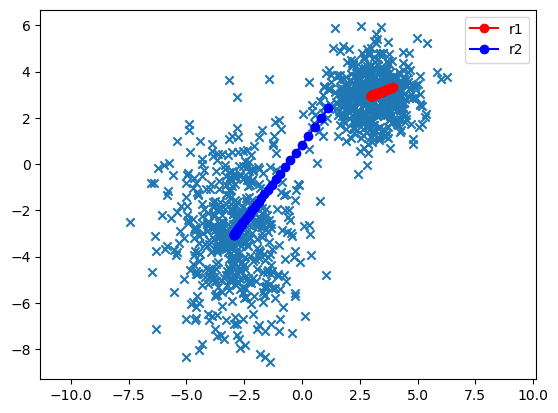

In [6]:
alapha = 10e-2
epochs = 50

# Initialize wannabe centroids
r1, r2 = c.T[np.random.choice(range(c.T.shape[0]), 2)]

# For history
hr1, hr2 = [r1.copy()], [r2.copy()]

for i in range(epochs):
    # Accumulation variables
    d1, d2, n1ex, n2ex= 0, 0, 0, 0

    # Iterate through all examples
    for x in c.T:
        # Calculate which r is closer and accumulate differences
        if np.linalg.norm(x - r1) < np.linalg.norm(x - r2):
            d1 += x - r1  # Accumulate difference for r1
            n1ex += 1     # Count the number of points assigned to r1
        else:
            d2 += x - r2  # Accumulate difference for r2
            n2ex += 1     # Count the number of points assigned to r2

    # After all points have been processed, update centroids
    if n1ex > 0:
        r1 += (alapha / n1ex) * d1  # Update r1 using the accumulated difference
    if n2ex > 0:
        r2 += (alapha / n2ex) * d2  # Update r2 using the accumulated difference

    # Save the new centroid positions to history
    hr1.append(r1.copy())
    hr2.append(r2.copy())

# Plot the final evolution of r1 and r2
plt.scatter(data[:, 0], data[:, 1], marker='x')
plt.axis('equal')  # Ensure that the x and y axes are scaled equally
plt.plot([r[0] for r in hr1], [r[1] for r in hr1], 'ro-', label='r1')
plt.plot([r[0] for r in hr2], [r[1] for r in hr2], 'bo-', label='r2')
plt.legend()
plt.show()


### Ex 1.5

The centroids try to move to the center of the clusters slowly in both cases.

# Ex 2

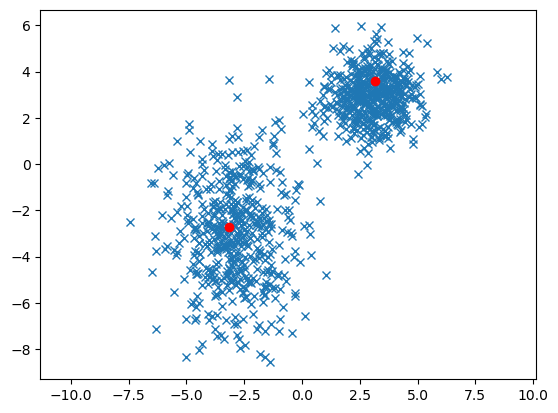

In [7]:
#--------------------------------EXERCICIO 2--------------------------------#
from scipy.spatial.distance import squareform, pdist

dados = [i for i in c.T]

while len(dados)>2:
    dist = squareform(pdist(dados, 'euclidean'))
    np.fill_diagonal(dist,2000.0)
    min1, min2 = np.unravel_index(np.argmin(dist),dist.shape)

    novo = (dados[min1] + dados[min2])/2

    dados = np.delete(dados, [min1, min2],axis=0)
    dados = np.vstack([dados,novo])

# Assuming 'c' is your original data with shape (2, 1000)
plt.plot(c[0,:], c[1,:], 'x',zorder=0) # Plot the original points using data from 'c'
plt.axis('equal')

plt.scatter(dados[:,0], dados[:,1],color='red',zorder=20) # Plot cluster centers with higher zorder
plt.show() # Show the plot with both sets of points

### Exercício 3

2


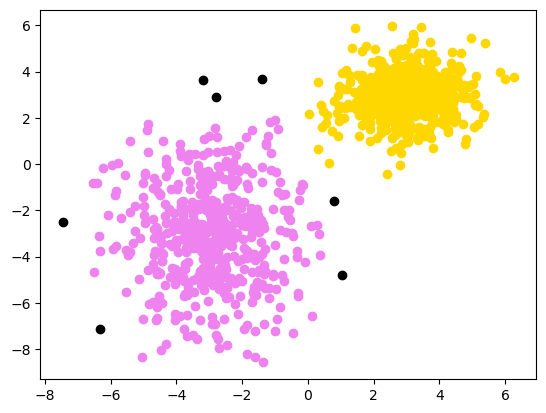

In [8]:
dados = c.T
novos_pontos = []
raio = 1
minimo_elementos = 3
max_iter = 10
restantes = []


def pontos(dadoss,ponto,raioo):
    pontos = np.array([ponto])

    for i in dadoss:
        if np.linalg.norm(ponto - i) <= raioo and i not in pontos:
            pontos = np.vstack([pontos,i])

    for k in range(0,max_iter):
        for i in pontos:
            for j in dados:
                if np.linalg.norm(i - j) <= raioo and j not in pontos:
                    pontos = np.vstack([pontos,j])

    return pontos

while len(dados)>0:
    r1 = dados[np.random.choice(len(dados))]
    pontoss = pontos(dados,r1,raio)

    if len(pontoss) < minimo_elementos:
        restantes.append(pontoss.tolist())

        for i in pontoss:
            dados = np.delete(dados, [np.where(dados == i)[0][0],np.where(dados == i)[0][1]],axis=0)
    else:
        ppt = pontoss.tolist()
        novos_pontos.append(ppt)

        for i in pontoss:
            dados = np.delete(dados, [np.where(dados == i)[0][0],np.where(dados == i)[0][1]],axis=0)


cores = ['violet','gold','aquamarine','blue','red','yellow','olive','peru','lime','green','tan','slateblue','firebrick','gainsboro','maroon','lemonchiffon','darkkhakai','honeydrew','pink','chocolate','peachpuff']
print(len(novos_pontos))
cor = 0

for i in novos_pontos:
    for j in i:
        plt.scatter(j[0], j[1],color=cores[cor],zorder=20)
    cor +=1
for i in restantes:
    for j in i:
        plt.scatter(j[0], j[1],color='black',zorder=10)

plt.show()